In [1]:
import json
import os
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import base64
import io

In [2]:
DATASET_PATH = "../Dataset"
ANNOTATION_PATH = "../Dataset/annotation.json"

with open(ANNOTATION_PATH, 'r') as f:
    df = json.load(f)

print(len(df))
print(os.listdir(DATASET_PATH))

275
['annotation.json', '.DS_Store', 'UrbanFlowComplexity', 'SafetyCompliance', 'annotation.xlsx', 'PerceptionReasoning']


In [3]:
'''OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',
  'category': 'SafetyCompliance/ObstacleRecognition',
  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',
  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',
  'distractor1': 'Drive directly up to the gate to make it open faster.',
  'distractor2': 'Assume the gate is for exit only and look for another entrance.',
  'distractor3': 'Attempt to tailgate another car through the gate.'},'''

"OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',\n  'category': 'SafetyCompliance/ObstacleRecognition',\n  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',\n  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',\n  'distractor1': 'Drive directly up to the gate to make it open faster.',\n  'distractor2': 'Assume the gate is for exit only and look for another entrance.',\n  'distractor3': 'Attempt to tailgate another car through the gate.'},"

In [4]:
id_list = []
image_path_list = []
question_list = []
explanation_list = []
answer_list = []

for data in df:
    id_list.append(data.split(".")[0])
    image_path_list.append(os.path.join(DATASET_PATH, df[data]['path']))
    question_list.append(df[data]['question'])
    explanation_list.append(df[data]['answers'])
    answer_list.append({
        'A': df[data]['answers'],
        'B': df[data]['distractor1'],
        'C': df[data]['distractor2'],
        'D': df[data]['distractor3'],
        })
    break

print(id_list[0])
print(image_path_list[0])
print(question_list[0])
print(explanation_list[0])
print(answer_list[0])

OR1
../Dataset/SafetyCompliance/ObstacleRecognition/OR1.png
The autonomous vehicle is approaching a closed gate. What is the correct course of action?
Approach the gate, stop at a safe distance, and wait for it to open before proceeding.
{'A': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.', 'B': 'Drive directly up to the gate to make it open faster.', 'C': 'Assume the gate is for exit only and look for another entrance.', 'D': 'Attempt to tailgate another car through the gate.'}


In [5]:
df_columns=['id','image', 'question', 'A', 'B', 'C', 'D', 'answer', 'explanation']
option_labels = ['A', 'B', 'C', 'D']
pd.DataFrame(columns=df_columns)

Empty DataFrame
Columns: [id, image, question, A, B, C, D, answer, explanation]
Index: []

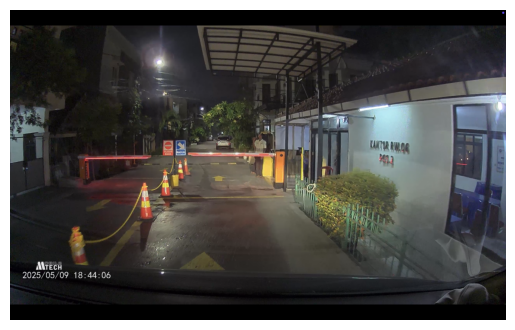

In [15]:
def encode_base64(im_path):
    # Determine the image format (optional but good practice)
    # You can hardcode this if you know the format, e.g., format="PNG"
    img_format = im_path.split('.')[-1].upper()
    if img_format == 'JPG':
        img_format = 'JPEG'

    try:
        # 1. Open the image
        image = Image.open(im_path)

        # 2. Create a byte buffer
        buffered = io.BytesIO()

        # 3. Save the image to the buffer in its original format
        image.save(buffered, format=img_format)

        # 4. Get the byte value and encode it
        img_byte = buffered.getvalue()
        base64_encoded_string = base64.b64encode(img_byte)

        # 5. Decode the bytes to a UTF-8 string
        base64_string = base64_encoded_string.decode('utf-8')

        return base64_string

    except FileNotFoundError:
        print(f"Error: The file at {im_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

im = encode_base64(image_path_list[0])
try:
    # 1. Decode the Base64 string into bytes
    image_bytes = base64.b64decode(im)

    # 2. Use io.BytesIO to read the bytes as a file
    image_buffer = io.BytesIO(image_bytes)

    # 3. Open the image with Pillow and display with Matplotlib
    image = Image.open(image_buffer)
    
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [7]:
processed_data = []

# Iterate over each item in your original data
for data_key, values in df.items():
    # 1. Store the original correct answer text
    correct_answer_text = values['answers']

    # 2. Collect all options into a list
    all_options = [
        values['answers'],
        values['distractor1'],
        values['distractor2'],
        values['distractor3']
    ]

    # 3. Shuffle the options randomly
    random.shuffle(all_options)

    # 4. Find the new position (0, 1, 2, or 3) of the correct answer
    correct_option_index = all_options.index(correct_answer_text)

    # 5. Get the corresponding label ('A', 'B', 'C', or 'D') for the correct answer
    correct_option_label = option_labels[correct_option_index]

    # 6. Build a dictionary for the current row
    row_data = {
        'id': data_key.split('.')[0],
        'image': encode_base64(os.path.join(DATASET_PATH, values['path'])),
        'question': values['question'],
        'A': all_options[0],
        'B': all_options[1],
        'C': all_options[2],
        'D': all_options[3],
        'answer': correct_option_label, # The randomized label ('A', 'B', 'C', or 'D')
        'explanation': correct_answer_text # The original, unchanging answer text
    }
    processed_data.append(row_data)

# Create the DataFrame from the list of processed row data
final_df = pd.DataFrame(processed_data, columns=df_columns)

# Save the DataFrame to an Excel file, without the pandas index
output_filename = '../Dataset/annotation.xlsx'
final_df.to_excel(output_filename, index=False)

print(f"Successfully created '{output_filename}'")
print("\nFirst 5 rows of the new DataFrame:")
final_df.head()


Error: The file at ../Dataset/PerceptionReasoning/LaneRecognition/LR9.jpg was not found.
Successfully created '../Dataset/annotation.xlsx'

First 5 rows of the new DataFrame:


id                                              image  \
0   OR1  b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAV...   
1  OR10  b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAV...   
2  OR11  b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAV...   
3  OR12  b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAV...   
4  OR13  b'iVBORw0KGgoAAAANSUhEUgAABusAAANwCAYAAAAm9leL...   

                                            question  \
0  The autonomous vehicle is approaching a closed...   
1  An obstacle is partially blocking the vehicle'...   
2  As a responsible driver, how should you naviga...   
3  The autonomous vehicle is exiting a building. ...   
4  The road ahead is narrow due to parked vehicle...   

                                                   A  \
0  Drive directly up to the gate to make it open ...   
1  Steer slightly to the right to safely maneuver...   
2  When the right lane is clear, signal and steer...   
3  Activate the turn signal, wait for the gate to...   
4  Wait for a sufficient gap in oncoming traffic ...   

                                                   B  \
0  Approach the gate, stop at a safe distance, an...   
1  Come to a complete stop and wait for the obsta...   
2  Move into the right lane without signaling to ...   
3  Exit without a turn signal as it's the only path.   
4  Accelerate to pass through the narrow gap befo...   

                                                   C  \
0  Attempt to tailgate another car through the gate.   
1  Maintain course and speed, assuming the obstac...   
2  Honk the horn to make the obstacle move out of...   
3  Accelerate quickly out of the gate to merge in...   
4  Turn on hazard lights and stop until the parke...   

                                                   D answer  \
0  Assume the gate is for exit only and look for ...      B   
1  Accelerate to get past the obstacle as quickly...      A   
2  Try to squeeze between the obstacle and the la...      A   
3  Proceed as soon as the gate starts opening to ...      A   
4  Proceed slowly and expect oncoming traffic to ...      A   

                                         explanation  
0  Approach the gate, stop at a safe distance, an...  
1  Steer slightly to the right to safely maneuver...  
2  When the right lane is clear, signal and steer...  
3  Activate the turn signal, wait for the gate to...  
4  Wait for a sufficient gap in oncoming traffic ...

In [8]:
final_df.isna().sum()

id             0
image          1
question       0
A              0
B              0
C              0
D              0
answer         0
explanation    0
dtype: int64

In [9]:
test_df = pd.read_excel(output_filename)

In [12]:
test_df.sample(1)['image'].item()

"b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAAABUmlDQ1BJQ0MgUHJvZmlsZQAAeJxtkD9LQlEYxn+GoJRg0B8IChwkQSzCanQwAwkcxCyy7Xo1DdQOVy36AEFjHyBIaG1oqs2G+gaFQ7RFg3tYVHB7r1Zq9cLD+fHwnHNeHhhAU6pgB4qlipGILnk2UpseRxMbTtxM4NP0sgrH4zGJ8H32T6shaZnbGest//P11X0j/1L3b/u8D27733zfDGayZV3OD9G0rowK2LzC8b2KsljEqCFLCR9anOvwscXpDp+3M8lERPhGeFjPaxnhO+FAusfP9XCxUNW/drC2d2VLa6vWPqJJYkTxkGRdevk/t9DORdhBsY/BNjnyVORWWBxFgazwCiV0ZgkIB5kTLVr9/u6t61VDEErKV7Wul3qEMxeMqK7nu4DxE6hPKc3Qftq0tezlrflgh8dOwflmms0DGFoG88k0X3dN8/0SHONwVPsEBZlgzF82FtUAAQAASURBVHic7P1ZkxxH1iQKWqy5AwmAW5FVXV+v9+GOSP+NeZiH+estMlekH+b2MrWRxI5cYx9RVTvm5h4RiUwgA0SQqmQgMyM83M3NbT1Hj55eSmmVDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMw9gD937oAhmEYhmEYhmEYhmEYhmEYhmEYhmEYhmEYhmEYhmEYhmEY94UJ0IZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZh7A1MgDYMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMY29gArRhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGHsDE6ANwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMw9gbmABtGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGIZhGMbewARowzAMwzAMwzAMwzAMwzAMwzAMw

In [10]:
im = test_df.sample(1)['image'].item()
try:
    image_bytes = base64.b64decode(im)
    image = Image.open(image_buffer)
    
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Incorrect padding


In [16]:
im = encode_base64(image_path_list[0])
print(im)

iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAAABUmlDQ1BJQ0MgUHJvZmlsZQAAeJxtkD9LQlEYxn+GoJRg0B8IChwkQSzCanQwAwkcxCyy7Xo1DdQOVy36AEFjHyBIaG1oqs2G+gaFQ7RFg3tYVHB7r1Zq9cLD+fHwnHNeHhhAU6pgB4qlipGILnk2UpseRxMbTtxM4NP0sgrH4zGJ8H32T6shaZnbGest//P11X0j/1L3b/u8D27733zfDGayZV3OD9G0rowK2LzC8b2KsljEqCFLCR9anOvwscXpDp+3M8lERPhGeFjPaxnhO+FAusfP9XCxUNW/drC2d2VLa6vWPqJJYkTxkGRdevk/t9DORdhBsY/BNjnyVORWWBxFgazwCiV0ZgkIB5kTLVr9/u6t61VDEErKV7Wul3qEMxeMqK7nu4DxE6hPKc3Qftq0tezlrflgh8dOwflmms0DGFoG88k0X3dN8/0SHONwVPsEBZlgzF82FtUAAQAASURBVHic7P3JjmRbsh0Ibu3MzN3vvfFe8ZEEOEiQNcgEBwlUzfgf/IH8hJrXuOb5CfkD+R8cFpADonKQZLGAHJAPeBHh193MtC1Is0Rk73NUTa3xxm6sFeHXzdWOnrPPbqVZIrJorZ0aQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRDEO8DyRzeAIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAiCIAjiWpAATRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRDEuwEJ0ARBEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBvBuQAE0QBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQBEEQxLsBCdAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQbwbkABNEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBEMS7AQnQ

In [11]:
test_df.sample(1)['image'].item()

"b'iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAAABUmlDQ1BJQ0MgUHJvZmlsZQAAeJxtkD9LQlEYxn+GoJRg0B8IChwkQSzCanQwAwkcxCyy7Xo1DdQOVy36AEFjHyBIaG1oqs2G+gaFQ7RFg3tYVHB7r1Zq9cLD+fHwnHNeHhhAU6pgB4qlipGILnk2UpseRxMbTtxM4NP0sgrH4zGJ8H32T6shaZnbGest//P11X0j/1L3b/u8D27733zfDGayZV3OD9G0rowK2LzC8b2KsljEqCFLCR9anOvwscXpDp+3M8lERPhGeFjPaxnhO+FAusfP9XCxUNW/drC2d2VLa6vWPqJJYkTxkGRdevk/t9DORdhBsY/BNjnyVORWWBxFgazwCiV0ZgkIB5kTLVr9/u6t61VDEErKV7Wul3qEMxeMqK7nu4DxE6hPKc3Qftq0tezlrflgh8dOwflmms0DGFoG88k0X3dN8/0SHONwVPsEBZlgzF82FtUAAQAASURBVHic7P0JbyNJlq2LGudJUwyZlVVdffv+/99ygAMc4AIH776H013VVZURGaFZ4uz+sPa2bYPTSZESqRAV68tkiIMP5ubmZuZuay9rOOdKRwghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIUdA80cngBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQraFAmhCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQsjRQAE0IYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCHkaKAAmhBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQcjRQAE0IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCDkaKIAmhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQcDRRAE0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCjgYKoAkhhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIUcDB